# Computational Neuroscience
### Week 4 quiz
###### by Mher Movsisyan

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# question 1:


entropy_binom = lambda p: -((np.log2(p) * p) + (np.log2(1-p) * (1-p)))
F_p = 0.1

entropy_binom(F_p)

0.4689955935892812

In [5]:
# question 2
S_p = 0.1 # probability of stimulus
F_p_s = 0.5 # probability of neuron firing given stimulus
F_p_ns = 1/18 # prob of neuron firing given no stim
def mutual_info(stim_p, p_s, p_ns): 
    running_information = 0
    stimulus_ps = [1 - stim_p, stim_p]
    response_ps_s = [[1 - p_ns, p_ns],
                     [1 - p_s, p_s]]
    joint_pdf = lambda s, p: s * p
    p_r = np.sum([response_ps_s[s][1] for s in [0, 1]])

    for s in [0, 1]:
        for r in [0, 1]:
            running_information += (p_sr := joint_pdf(
                    (p_s := stimulus_ps[s]), 
                    (response_ps_s[s][r]))
                ) * np.log(p_sr/(p_r * p_s))

    return running_information

mutual_info(S_p, F_p_s, F_p_ns)

0.3253687071873599

In [6]:
# question 7

import pickle

with open('c4p7.pickle', 'rb') as f:
    data = pickle.load(f)

data

{'neuron4': array([[18.1, 12.1,  6. , ..., 26.7, 25.4, 23.1],
        [17.4, 14.8,  6.7, ..., 27.3, 27. , 25.4],
        [17.6, 14.8,  7.6, ..., 29.4, 26.2, 22.9],
        ...,
        [20.1, 12.8,  7.6, ..., 25.3, 26.5, 24.3],
        [18.1, 12.3,  7.4, ..., 26.3, 27. , 23.9],
        [17.9, 15.3,  6.4, ..., 26.2, 26.8, 25. ]]),
 'stim': array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
        165., 180., 195., 210., 225., 240., 255., 270., 285., 300., 315.,
        330., 345.]),
 'neuron3': array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ]]),
 'neuron2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

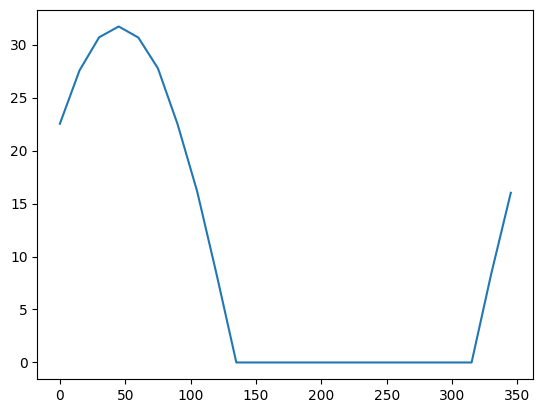

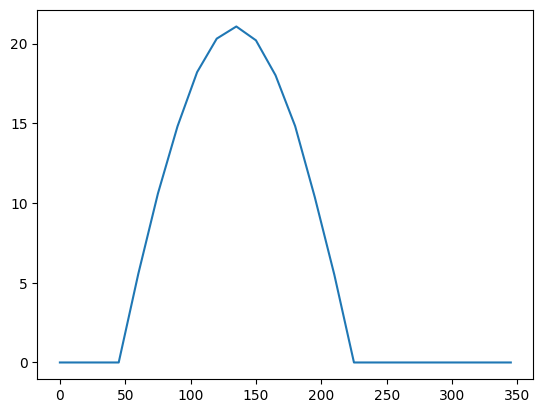

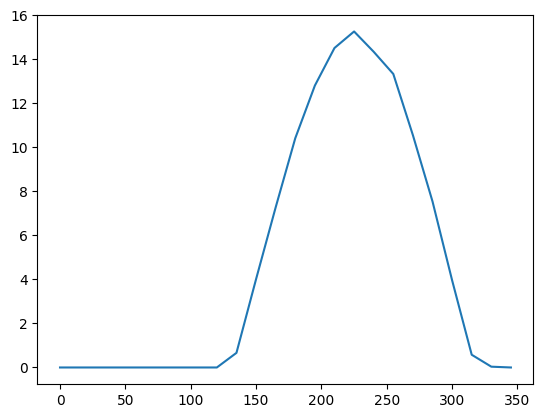

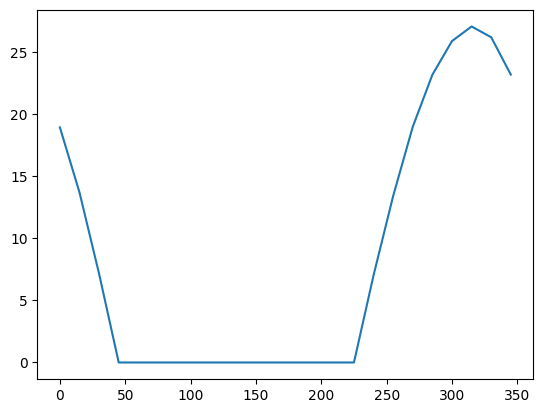

In [8]:
for i in range(1, 5):
    plt.plot(data["stim"], np.mean(data[f"neuron{i}"], axis=0))
    plt.show()

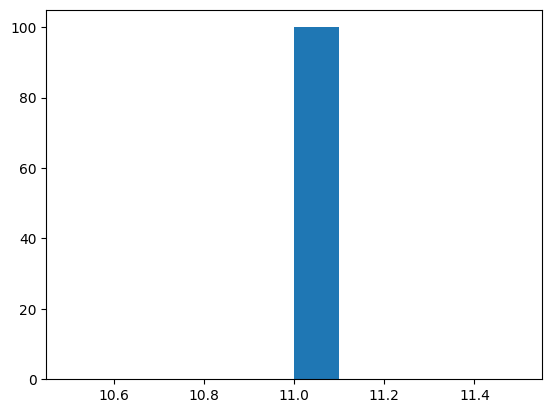

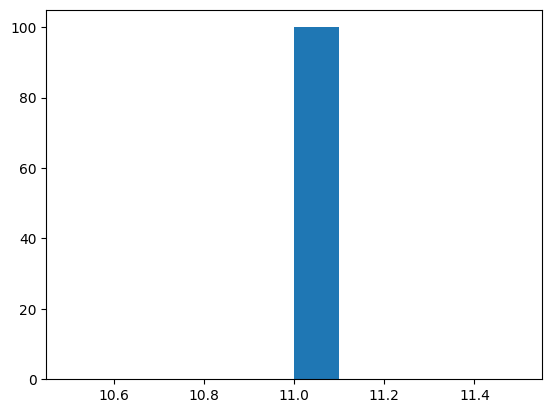

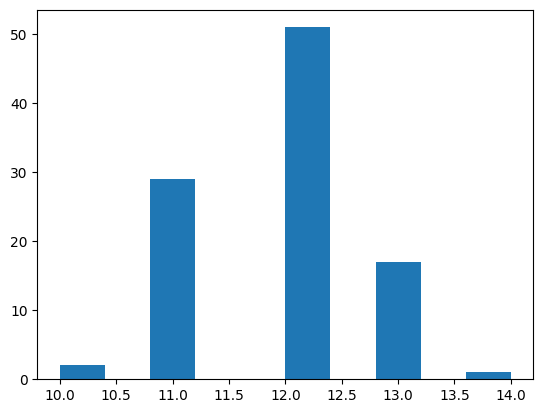

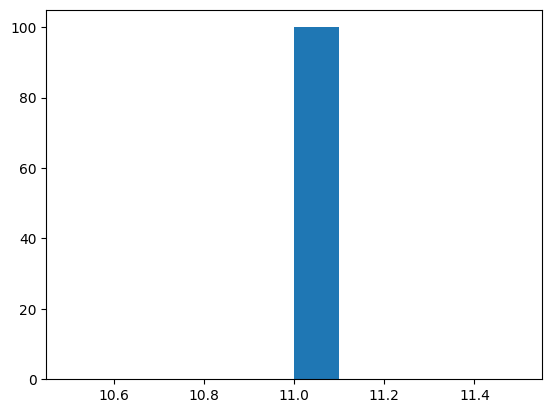

In [10]:
for i in range(1, 5):
    plt.hist(np.count_nonzero(data[f"neuron{i}"], axis=1))
    plt.show()

In [11]:
with open('c4p9.pickle', 'rb') as f:
    data = pickle.load(f)

data

{'c1': array([0.70710678, 0.70710678]),
 'r1': array([11.9, 12.8, 13.9, 12.1, 11.3, 12.2, 12.9, 12.4, 13.2, 10.7]),
 'r3': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'c2': array([ 0.70710678, -0.70710678]),
 'c3': array([-0.70710678, -0.70710678]),
 'r2': array([18.8, 18. , 19. , 19.1, 18.1, 21.5, 20.3, 21.2, 18.6, 20.4]),
 'c4': array([-0.70710678,  0.70710678]),
 'r4': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

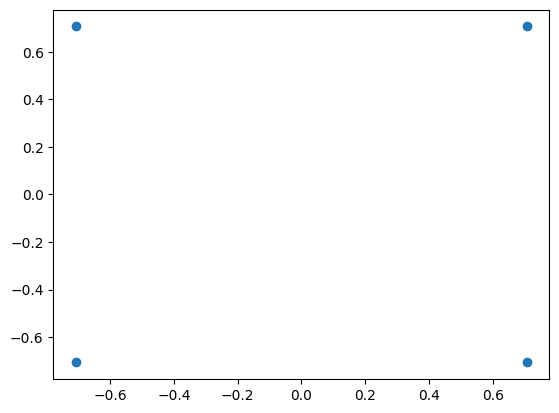

In [14]:
coords_x = [data["c" + str(i+1)][0] for i in range(4)]
coords_y = [data["c" + str(i+1)][1] for i in range(4)]
plt.scatter(coords_x, coords_y)

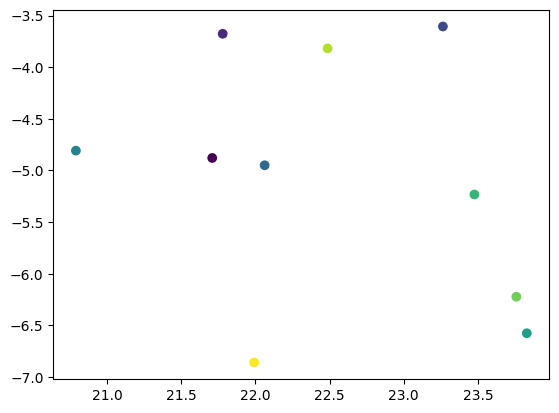

In [26]:
x = np.dot(np.expand_dims(data["r1"], axis=1), np.expand_dims(data["c1"], axis=0))[:, 0]
y = np.dot(np.expand_dims(data["r1"], axis=1), np.expand_dims(data["c1"], axis=0))[:, 1]

x_2 = np.dot(np.expand_dims(data["r2"], axis=1), np.expand_dims(data["c2"], axis=0))[:, 0]
y_2 = np.dot(np.expand_dims(data["r2"], axis=1), np.expand_dims(data["c2"], axis=0))[:, 1]

plt.scatter(x+x_2, y+y_2, c=list(range(len(x))))
plt.show()

In [42]:
argmx = np.argmax([np.mean(data["r1"]), np.mean(data["r2"])])
argmx_r1 = np.argmax(data["r1"])
argmx_r2 = np.argmax(data["r2"])
np.arctan2(*(data[f"c1"] * data["r1"][argmx_r2] + data[f"c2"] * data["r2"][argmx_r2]))/np.pi * 180

105.42760923918561

In [39]:
np.arctan2(1, 0)/np.pi * 180

90.0